<a href="https://colab.research.google.com/github/martincortinaescudero/Web-Scraping-Apartment-s-Data-Project/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping: Extracting the Data

In [ ]:
import requests
from bs4 import BeautifulSoup
from bs4 import UnicodeDammit

In [ ]:
def extract(page):
  headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}
  url = f'https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Muenchen.90.1.1.{page}.html'
  r = requests.get(url, headers)
  soup = BeautifulSoup(r.content, 'html.parser')
  return soup



'''
https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Muenchen.90.1.1.0.html
'''


'\nhttps://www.wg-gesucht.de/1-zimmer-wohnungen-in-Muenchen.90.1.1.0.html\n'

In [ ]:
c = extract(0)
soup = c.find_all('div', class_= 'col-sm-8 card_body')

In [ ]:
print(df.shape)
print(21*6)
df.tail(12)

(126, 4)
126


,Name,Price,Square Meters,Description
114,Renting my cozy 1 room/studio apartment near Am Harras.,1075,24,1-Zimmer-Wohnung | München Sendling | Plinganserstraße
115,"Schöne, helle 1-Zimmer-Wohnung mit großem Balkon",840,33,1-Zimmer-Wohnung | München Moosach | Hanauerstr. 39
116,Dachgeschoss Appartement in WG ab 01.04.2024 eventuell früher!,750,35,1-Zimmer-Wohnung | München Neu-Esting/Olching | Olchingerstrasse
117,"Helles Studentenappartement mit Balkon, Bad & Küche",899,22,1-Zimmer-Wohnung | München Laim | Landsberger Straße 272
118,NACHMIETER GESUCHT! Zwingende Abnahme der Möbel!,1120,40,1-Zimmer-Wohnung | München Obergiesing-Fasangarten | Untersbergstraße 88a
119,Möbliert inkl. aller NK: Neuwertige 1 Zi. Wohnung // Turn-key & all costs incl. 1 room apartment,750,33,1-Zimmer-Wohnung | München Feldmoching-Hasenbergl | Salbeistr. 15
120,1 Room Apartment for Sublet,800,20,1-Zimmer-Wohnung | München Maxvorstadt | Dachauerstraße 7
121,🌟 Gemütliches Zimmer in 3er WG am Hirschgraten zu vermieten! 🌟,500,20,1-Zimmer-Wohnung | München München | Fasoltstr. 7
122,1 Zi Wohnung im Lehel zur Zwischenmiete ab sofort,1000,30,1-Zimmer-Wohnung | München Altstadt-Lehel | Reitmorstraße 10
123,1-Zimmer Wohnung-650€ für 2 Wochen,650,32,1-Zimmer-Wohnung | München Sendling | Brudermühlstraße


# Web Scraping: Filtering the data

In [ ]:
soup = c.find_all('div', class_= 'col-sm-8 card_body')

first = soup[1]

first.text


'\n\n\n\n\n                            Zentrales, helles, möbliertes Apartment in Berg-am-Laim ab sofort | Central, bright, furnished apartment in Berg-am-Laim available immediately\n                        \n\n\n\n\n\n\n\n                        1-Zimmer-Wohnung \n                         |\n\n                                                                                    München\n                            \n                            Berg am Laim |\n                        \n                        Berg-am-Laim-Str. 73\n                    \n\n\n\n\n950 €\n\n\n                                                                    01.02.2024\n                    \n                                    \n\n25 m²\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAndreas\nOnline: 6 Minuten\n\n\n\n\n\n\n\n'

In [ ]:
name = first.find('h3', {'class': 'truncate_title noprint'}).text.strip()
print(name)

eine Zimmer Apartment ab sofort bis Ende Februar zu vermieten


In [ ]:
des = first.find('div', {'class': 'col-xs-11'}).text.replace("\n", "").replace(" ", "")
print(des)

1-Zimmer-Wohnung|München|balanstr


In [ ]:
price = first.find('div', {'class': 'col-xs-3'}).text.replace('€', '').strip()
print(price)


740 



In [ ]:
meters = first.find('div', {'class': 'col-xs-3 text-right'}).text.replace('m²', '').strip()
print(meters)

if meters == "":
  print("correct")
else:
  print("incorrect")

25
incorrect


In [ ]:
#Use the Slit function to take out the m2 if needed
meters = first.find('div', {'class': 'col-xs-3 text-right'}).text.split()[:-1]
print(meters)


['34']


In [ ]:
counter = 0
for apa in soup[1:]:
  try:
    name = apa.find('h3', {'class': 'truncate_title noprint'}).text.strip()
  except:
    name = ''
  try:
    des = apa.find('div', {'class': 'col-xs-11'}).text.replace("\n", "")
  except:
    des = ''
  try:
    price = apa.find('div', {'class': 'col-xs-3'}).text.strip()[:-1]
  except:
    price = ''
  try:
    meters = apa.find('div', {'class': 'col-xs-3 text-right'}).text.strip()[:-2]
  except:
    meters = ''
  counter += 1

  print("Apartment Nº", counter)
  print(name)
  print(des)
  print(price)
  print(meters)


**Note:** The apartment in position 7 and the last 6 apartments are part of "recommended" apartment from verified users. Therefore, the ones extracted are not the same as the one in the page. Maybe this are biased. Think about not includen them as they might generate a bias.

# Retrieve the data into a Data Frame

In [ ]:
# Import Panda
import pandas as pd

# Create lists
name = []
description = []
price = []
meters= []

# Retrieve into Pandas
for i in range(0, 6):
  c = extract(i)
  soup = c.find_all('div', class_= 'col-sm-8 card_body')
  for apartment in soup[1:22]:
    name.append(apartment.find('h3', {'class': 'truncate_title noprint'}).text.strip())
    price.append(apartment.find('div', {'class': 'col-xs-3'}).text.replace('€', '').strip())
    meters.append(apartment.find('div', {'class': 'col-xs-3 text-right'}).text.replace('m²', '').strip())
    description.append(apartment.find('div', {'class': 'col-xs-11'}).text.replace("\n", ""))

# Note: I only take ads with index from 1 to 22 because ads outside this range might contain fake or biased information (they are promoted ads with algorithm-based pricing)
df = pd.DataFrame(list(zip(name, price, meters, description)), columns=["Name", "Price", "Square Meters", "Description"])

In [ ]:
'''
# Import Panda
import pandas as pd

# Create lists
name = []
description = []
price = []
meters= []

for apartment in soup[1:22]:
    name.append(apartment.find('h3', {'class': 'truncate_title noprint'}).text.strip())
    price.append(apartment.find('div', {'class': 'col-xs-3'}).text.replace('€', '').strip())
    meters.append(apartment.find('div', {'class': 'col-xs-3 text-right'}).text.replace('m²', '').strip())
    description.append(apartment.find('div', {'class': 'col-xs-11'}).text.replace("\n", ""))

# Note: I only take ads with index from 1 to 22 because ads outside this range might contain fake or biased information (they are promoted ads with algorithm-based pricing)
df = pd.DataFrame(list(zip(name, price, meters, description)), columns=["Name", "Price", "Square Meters", "Description"])
'''

In [ ]:
#pd.reset_option('display.max_colwidth')
pd.set_option('display.max_colwidth', None)
df.head(30)

In [ ]:
#df['Description'] = df['Description'].str.replace('\s+', ' ', regex=True).str.strip()


In [ ]:
# 1. Split into three cells using the | symbol
df[['Type', 'Area', 'Address']] = df['Description'].str.split('|', expand=True)
df.drop('Description', axis=1, inplace=True)
df.head(30)

In [ ]:
# 2. Filter rows without a price or square meters

# New row data
new_row_1 = {'Price': '', 'Square Meters': ''}
new_row_2 = {'Price': '', 'Square Meters': ''}
new_row_3 = {'Price': '', 'Square Meters': ''}

# Add rows
df.loc[len(df)] = new_row_1
df.loc[len(df)] = new_row_2
df.loc[len(df)] = new_row_3

df.tail(4)

,Name,Price,Square Meters,Type,Area,Address
125,Helle 1-Zimmer-Wohnung im Herzen von München- Schwabing-West /Persönliche Besichtigung möglich,1180,27,1-Zimmer-Wohnung,München Schwabing-West,Elisabethstr. 57
126,NaN,,,NaN,NaN,NaN
127,NaN,,,NaN,NaN,NaN
128,NaN,,,NaN,NaN,NaN


In [ ]:
new_df = df
new_df["Price"] = df["Price"].replace(to_replace = [''], value = [0])
new_df["Square Meters"] = df["Square Meters"].replace(to_replace = [''], value = [0])

new_df.tail(4)

In [ ]:
# Define the condition for dropping rows
condition = new_df['Square Meters'] == 0

# Use boolean indexing to drop rows that meet the condition
new_df = new_df[~condition]

# Check
print(new_df.shape)
new_df.tail(4)

# Option to filter rather than drop:
# new_df = new_df[new_df['Square Meters'] != 0]



In [ ]:
# 4. Filter ads without proper address

# Define condition
condition1 = new_df['Address'].str.contains(r'\d+', regex=True)
condition2 = new_df['Address'].str.strip().str.match(r'^\d+$')

# Use boolean indexing to drop rows that do not meet the condition
new_df = new_df[condition1]
new_df = new_df[~condition2]

print(new_df.shape)


(81, 6)


<ipython-input-70-c4c5c5ff96c5>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
#5. Get the price by square meter

# Transform values from string to integer
new_df['Price'] = new_df['Price'].astype(int)
new_df['Square Meters'] = new_df['Square Meters'].astype(int)

print(new_df.columns)
print(new_df.dtypes)


Index(['Name', 'Price', 'Square Meters', 'Type', 'Area', 'Address'], dtype='object')
Name             object
Price             int64
Square Meters     int64
Type             object
Area             object
Address          object
dtype: object


In [ ]:
# Calcualte Price of Square meter
new_df['Price of M2 (€)'] = (new_df['Price'] / new_df['Square Meters']).round(2)
new_df.head(1)

,Name,Price,Square Meters,Type,Area,Address,Price of M2 (€)
0,1 bis 2 Zimmer Wohnung zentral ruhig Kurzzeit Zwischenmiete möbliert top,1244,60,1-Zimmer-Wohnung,München Sendling,Hansastr. 122,20.73


# Exploratory statistics

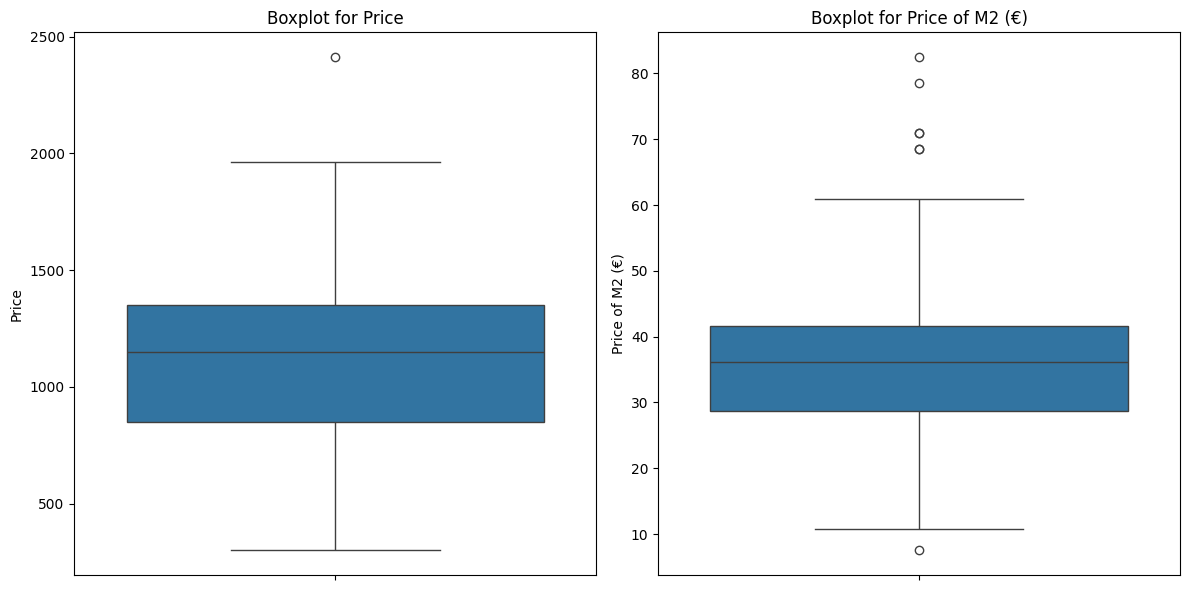

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot for the variable "Price"
sns.boxplot(y=new_df['Price'], ax=axes[0])
axes[0].set_title('Boxplot for Price')

# Boxplot for the variable "Price of M2 (€)"
sns.boxplot(y=new_df['Price of M2 (€)'], ax=axes[1])
axes[1].set_title('Boxplot for Price of M2 (€)')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

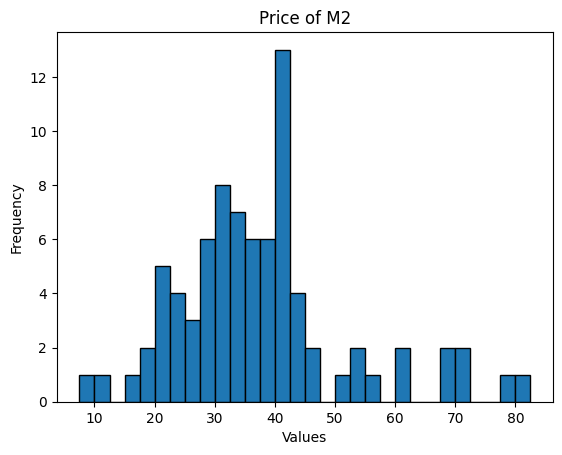

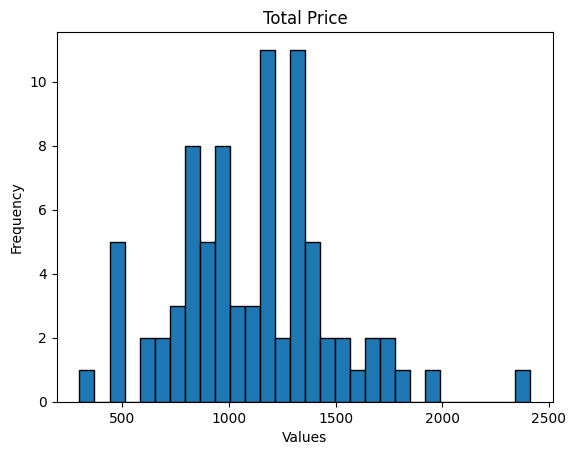

In [ ]:
# Plotting the histogram
plt.hist(new_df['Price of M2 (€)'], bins=30, edgecolor='black')
plt.title('Price of M2')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Plotting the histogram
plt.hist(new_df['Price'], bins=30, edgecolor='black')
plt.title('Total Price')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()



In [ ]:
'''
# Quantiles, Quartiles, IQR
print("The minimum value is : ", new_df['Price'].min())
print("The maximum value is : ", new_df['Price'].max())
print("The median value is : ", new_df['Price'].median(), '\n')

q1, q2, q3 = new_df['Price'].quantile(q=[0.25, 0.5, 0.75])

print("The quartiles are :", "q1 =", q1, ", q2 =", q2, ", q3 =", q3, '\n')

# Extreme values: 1.5 thresholds, extreme values  and outliers.
# Thresholds :
range = q3-q1
threshold_min = q1 - 1.5*range
threshold_max = q3 + 1.5*range

# Print
print("The extreme values are the values lower than", threshold_min ,
      "and the values upper than", threshold_max)


############
#Filter

# filtered_df = new_df[(new_df['Price'] <= threshold_min) | (new_df['Price'] >= threshold_max)]
# filtered_df.head(10)

print(new_df.shape)
filtered_df = new_df[(new_df['Price'] >= threshold_min) & (new_df['Price'] <= threshold_max)]
print(filtered_df.shape)

new_df = filtered_df
print(new_df.shape)

'''

In [ ]:
# Quantiles, Quartiles, IQR
print("The minimum value is : ", new_df['Price of M2 (€)'].min())
print("The maximum value is : ", new_df['Price of M2 (€)'].max())
print("The median value is : ", new_df['Price of M2 (€)'].median(), '\n')

q1, q2, q3 = new_df['Price of M2 (€)'].quantile(q=[0.25, 0.5, 0.75])

print("The quartiles are :", "q1 =", q1, ", q2 =", q2, ", q3 =", q3, '\n')

# Extreme values: 1.5 thresholds, extreme values  and outliers.
# Thresholds :
range = q3-q1
threshold_min = q1 - (1.5*range)
threshold_max = q3 + (1.5*range)

threshold_min = round(threshold_min, 2)
threshold_max = round(threshold_max, 2)

# Print
print("The extreme values are the values lower than", threshold_min ,
      "and the values upper than", threshold_max)


The minimum value is :  7.5
The maximum value is :  82.5
The median value is :  36.1 

The quartiles are : q1 = 28.75 , q2 = 36.1 , q3 = 41.67 

The extreme values are the values lower than 9.37 and the values upper than 61.05


In [ ]:
# filtered_df = new_df[(new_df['Price'] <= threshold_min) | (new_df['Price'] >= threshold_max)]
# filtered_df.head(10)

print(new_df.shape)
filtered_df = new_df[(new_df['Price of M2 (€)'] >= threshold_min) & (new_df['Price of M2 (€)'] <= threshold_max)]
print(filtered_df.shape)

new_df = filtered_df
print(new_df.shape)

(81, 7)
(74, 7)
(74, 7)


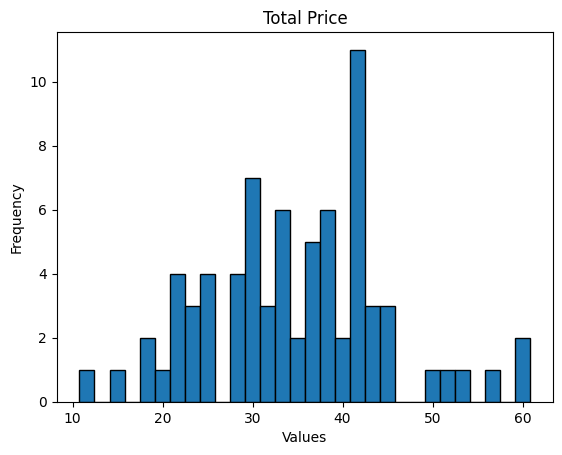

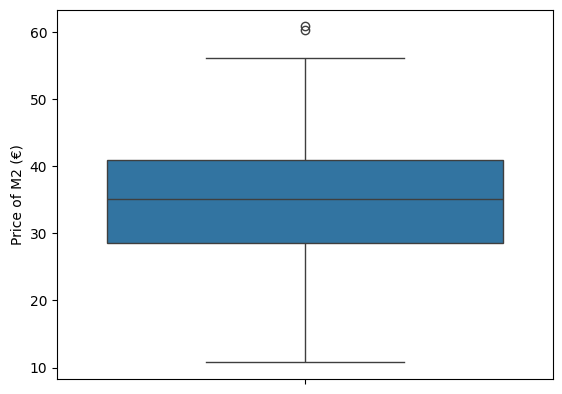

In [ ]:
# Plotting the histogram
plt.hist(filtered_df['Price of M2 (€)'], bins=30, edgecolor='black')
plt.title('Total Price')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Boxplot for the variable "Price"
sns.boxplot(y=filtered_df['Price of M2 (€)'])
plt.show()

# Get the coordinates with Geopy

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
nom = Nominatim(user_agent="geopy.geocoders.options.default_user_agent")

In [ ]:
n = nom.geocode("Grünwalder Straße 24, Munich, Germany")
print(n)
print(n.latitude, n.longitude)

24, Grünwalder Straße, Giesing, Untergiesing-Harlaching, München, Bayern, 81547, Deutschland
48.1072158 11.5720772


In [ ]:
coor_df = new_df
coor_df['New_address'] = coor_df['Address']+", Munich, Germany"

coor_df.head(20)

,Name,Price,Square Meters,Type,Area,Address,Price of M2 (€),New_address
0,1 bis 2 Zimmer Wohnung zentral ruhig Kurzzeit Zwischenmiete möbliert top,1244,60,1-Zimmer-Wohnung,München Sendling,Hansastr. 122,20.73,"Hansastr. 122 , Munich, Germany"
1,Studio temporary available from 4 Feb - 16 March,850,24,1-Zimmer-Wohnung,München Schwabing-West,Ricarda-Huch-Straße 1,35.42,"Ricarda-Huch-Straße 1 , Munich, Germany"
2,Wunderschönes 1- Zimmerapartment mit Gartenanteil in traumhafter Lage,1390,36,1-Zimmer-Wohnung,München Neuhausen-Nymphenburg,Irnfriedstrasse 9,38.61,"Irnfriedstrasse 9 , Munich, Germany"
3,Hotel - like,500,23,1-Zimmer-Wohnung,München Moosach,Gneisenaustr 24,21.74,"Gneisenaustr 24 , Munich, Germany"
4,Untermiete (31.03. - 30.09.) möblierte 1-Zimmer-Wohnung zentral in München,650,18,1-Zimmer-Wohnung,München Maxvorstadt,Dachauer Straße 87,36.11,"Dachauer Straße 87 , Munich, Germany"
7,"11.03.-07.04.2024: 1 Person, Serviced Apartment",1200,39,1-Zimmer-Wohnung,München Schwanthalerhöhe,Gollierstr. 36,30.77,"Gollierstr. 36 , Munich, Germany"
9,Spacious and furnished 1 room studio apartment,870,25,1-Zimmer-Wohnung,München München,Volkartstrasse 34,34.80,"Volkartstrasse 34 , Munich, Germany"
11,"Zentrales, helles, möbliertes Apartment in Berg-am-Laim ab sofort | Central, bright, furnished apartment in Berg-am-Laim available immediately",950,25,1-Zimmer-Wohnung,München Berg am Laim,Berg-am-Laim-Str. 73,38.00,"Berg-am-Laim-Str. 73 , Munich, Germany"
13,Modernes Apartment in Schwabing,1350,33,1-Zimmer-Wohnung,München Schwabing-Freimann,Leopoldstraße 206,40.91,"Leopoldstraße 206 , Munich, Germany"
15,Möbliertes Apartment in Solln mit großzügigem Balkon,1200,40,1-Zimmer-Wohnung,München Solln,Geigenbergerstr. 26,30.00,"Geigenbergerstr. 26 , Munich, Germany"


In [ ]:
coor_df['Coordinates'] = coor_df['New_address'].apply(nom.geocode)

coor_df.head()


,Name,Price,Square Meters,Type,Area,Address,Price of M2 (€),New_address,Coordinates
0,1 bis 2 Zimmer Wohnung zentral ruhig Kurzzeit Zwischenmiete möbliert top,1244,60,1-Zimmer-Wohnung,München Sendling,Hansastr. 122,20.73,"Hansastr. 122 , Munich, Germany","(122, Hansastraße, Hansapark, Land in Sonne, Sendling-Westpark, München, Bayern, 81373, Deutschland, (48.1240186, 11.5353374))"
1,Studio temporary available from 4 Feb - 16 March,850,24,1-Zimmer-Wohnung,München Schwabing-West,Ricarda-Huch-Straße 1,35.42,"Ricarda-Huch-Straße 1 , Munich, Germany","(Studio M, 1, Ricarda-Huch-Straße, Milbertshofen, Milbertshofen-Am Hart, München, Bayern, 80807, Deutschland, (48.17841315, 11.57467484142564))"
2,Wunderschönes 1- Zimmerapartment mit Gartenanteil in traumhafter Lage,1390,36,1-Zimmer-Wohnung,München Neuhausen-Nymphenburg,Irnfriedstrasse 9,38.61,"Irnfriedstrasse 9 , Munich, Germany","(9, Irnfriedstraße, Nymphenburg, Neuhausen-Nymphenburg, München, Bayern, 80639, Deutschland, (48.1498896, 11.5025521))"
3,Hotel - like,500,23,1-Zimmer-Wohnung,München Moosach,Gneisenaustr 24,21.74,"Gneisenaustr 24 , Munich, Germany","(The Flag - Serviced Apartments, 24, Gneisenaustraße, Alt Moosach, Moosach, München, Bayern, 80992, Deutschland, (48.1781949, 11.533492126589472))"
4,Untermiete (31.03. - 30.09.) möblierte 1-Zimmer-Wohnung zentral in München,650,18,1-Zimmer-Wohnung,München Maxvorstadt,Dachauer Straße 87,36.11,"Dachauer Straße 87 , Munich, Germany","(87, Dachauer Straße, St. Benno-Viertel, St. Benno, Maxvorstadt, München, Bayern, 80335, Deutschland, (48.150999, 11.5574863))"


In [ ]:
coor_df['Latitude'] = coor_df['Coordinates'].apply(lambda x: x.latitude if x != None else None)
coor_df['Longitude'] = coor_df['Coordinates'].apply(lambda x: x.longitude if x != None else None)
coor_df.head()

,Name,Price,Square Meters,Type,Area,Address,Price of M2 (€),New_address,Coordinates,Latitude,Longitude
0,1 bis 2 Zimmer Wohnung zentral ruhig Kurzzeit Zwischenmiete möbliert top,1244,60,1-Zimmer-Wohnung,München Sendling,Hansastr. 122,20.73,"Hansastr. 122 , Munich, Germany","(122, Hansastraße, Hansapark, Land in Sonne, Sendling-Westpark, München, Bayern, 81373, Deutschland, (48.1240186, 11.5353374))",48.124019,11.535337
1,Studio temporary available from 4 Feb - 16 March,850,24,1-Zimmer-Wohnung,München Schwabing-West,Ricarda-Huch-Straße 1,35.42,"Ricarda-Huch-Straße 1 , Munich, Germany","(Studio M, 1, Ricarda-Huch-Straße, Milbertshofen, Milbertshofen-Am Hart, München, Bayern, 80807, Deutschland, (48.17841315, 11.57467484142564))",48.178413,11.574675
2,Wunderschönes 1- Zimmerapartment mit Gartenanteil in traumhafter Lage,1390,36,1-Zimmer-Wohnung,München Neuhausen-Nymphenburg,Irnfriedstrasse 9,38.61,"Irnfriedstrasse 9 , Munich, Germany","(9, Irnfriedstraße, Nymphenburg, Neuhausen-Nymphenburg, München, Bayern, 80639, Deutschland, (48.1498896, 11.5025521))",48.149890,11.502552
3,Hotel - like,500,23,1-Zimmer-Wohnung,München Moosach,Gneisenaustr 24,21.74,"Gneisenaustr 24 , Munich, Germany","(The Flag - Serviced Apartments, 24, Gneisenaustraße, Alt Moosach, Moosach, München, Bayern, 80992, Deutschland, (48.1781949, 11.533492126589472))",48.178195,11.533492
4,Untermiete (31.03. - 30.09.) möblierte 1-Zimmer-Wohnung zentral in München,650,18,1-Zimmer-Wohnung,München Maxvorstadt,Dachauer Straße 87,36.11,"Dachauer Straße 87 , Munich, Germany","(87, Dachauer Straße, St. Benno-Viertel, St. Benno, Maxvorstadt, München, Bayern, 80335, Deutschland, (48.150999, 11.5574863))",48.150999,11.557486


# Plot the data in a map

In [ ]:
import plotly.express as px

dir(px)

In [ ]:
help(px.scatter_mapbox)

In [ ]:
map = px.scatter_mapbox(coor_df,
                     lat = coor_df["Latitude"],
                     lon = coor_df["Longitude"],
                     zoom = 3,
                     color = coor_df["Price of M2 (€)"],
                     size = coor_df["Square Meters"],
                     text = coor_df["Name"],
                     width = 1000,
                     height= 500,
                     title = "Rent price of Square Meter for one-bedroom apartment in Munich"
                     )

map.update_layout(mapbox_style="open-street-map")
map.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 10})
map.show()

**Other links**

https://developers.google.com/maps/documentation/geocoding/overview?hl=es-419

https://thedatafrog.com/en/articles/show-data-google-map-python/

1. Exclude low and high prices
2. Exclude address without the number?
3. Check quality of address/coordinate
4. Simplify address (add Munich at the beginning)
5. See where to put exploratory statistics
6. Exclude description? Maybe move it to the last column
7. See how to extract map!
8. Price of M2 in Euro


Very important: take out the 6 last anzeige as they are probably biased.
Also there is one in the middle (position 11th).

Write a code for excluding when "verifiziert Unternehmen" (You should also scrap this data)

Pandas
1. Exclude low and high prices
2. Exclude address without the number?
3. Simplify address (add Munich at the beginning)
4. Exclude description? Maybe move it to the last column
5. Price of M2 in Euro

Coordinate
1. Check quality of address/coordinate
2. See how to extract map!

Others
1. See where to put exploratory statistics

